In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('wildfires_clean.csv', index_col=0)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,id,year,disc_date,disc_doy,cause_code,cause,size,size_class,lat,lon,state
0,1,2005,2005-02-02,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,2004,2004-05-12,133,1.0,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,2004,2004-05-31,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,2004,2004-06-28,180,1.0,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,2004,2004-06-28,180,1.0,Lightning,0.10,A,38.559167,-119.933056,CA


In [4]:
df.disc_date = pd.to_datetime(df.disc_date)

In [5]:
df.dtypes

id                     int64
year                   int64
disc_date     datetime64[ns]
disc_doy               int64
cause_code           float64
cause                 object
size                 float64
size_class            object
lat                  float64
lon                  float64
state                 object
dtype: object

Adding square meters column. 1 acre = 4046.8564224 square meters

In [6]:
func = lambda x: x * 4046.8564224
df['size_sqmt'] = df['size'].apply(func)

## Are wildfires more dangerous in the summer?

Adding a season column for easier analysis.

In [7]:
Y = 2000
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

In [8]:
def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [9]:
df['season'] = df.disc_date.apply(get_season)

In [10]:
func = lambda x: 'summer' if x == 'summer' else 'rest_of_year'

In [11]:
df['season_div'] = df['season'].apply(func)

### Two-tailed test

In [12]:
mean_acres = df.groupby(['season_div', 'year']).mean()['size_sqmt']

$H_0$ = The mean acres burned in summer is equal to the mean of acres burned in the rest of the year.

In [13]:
stats.ttest_ind(mean_acres.loc['summer',:], mean_acres.loc['rest_of_year',:], equal_var=False)

Ttest_indResult(statistic=5.542179622931899, pvalue=5.992742230101627e-06)

We can reject the null hypothesis.

### One-tailed test

$H_0$ = The mean acres burned in summer is less than or equal the mean of acres burned in the rest of the year.

In [14]:
stats.ttest_ind(mean_acres.loc['summer',:], mean_acres.loc['rest_of_year',:], equal_var=False)

Ttest_indResult(statistic=5.542179622931899, pvalue=5.992742230101627e-06)

We can reject the null hypothesis.

## Plot for presentation

In [28]:
plt.style.use('dark_background')

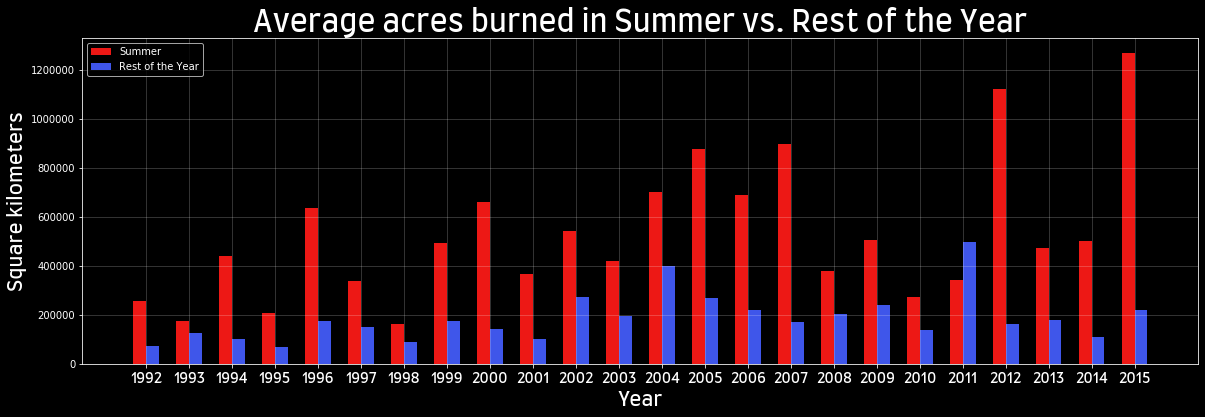

In [41]:
ind = np.arange(len(df.groupby('year').mean()['size_sqmt'].index))
width = 0.3

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(ind - width/2, df[df.season_div == 'summer'].groupby('year').mean()['size_sqmt'], width,
       label='Summer', color='#ed1815')
ax.bar(ind + width/2, df[df.season_div == 'rest_of_year'].groupby('year').mean()['size_sqmt'], width,
       label='Rest of the Year', color='#3f56ea')
plt.title('Average acres burned in Summer vs. Rest of the Year', fontsize=30, fontname='Farro')
ax.grid(alpha=0.25, )
ax.set_xlabel('Year', fontsize=20, fontname='Farro')
ax.set_ylabel('Square kilometers', fontsize=20, fontname='Farro')
ax.set_xticks(range(len(df.year.unique())))
ax.set_xticklabels(sorted(df.year.unique().tolist()), fontsize=15, fontname='Farro')

#plt.savefig('mean_acres_summer.png', dpi=300)

ax.legend()
plt.show()

In [50]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

{'Abyssinica SIL',
 'Ani',
 'AnjaliOldLipi',
 'Chandas',
 'Chilanka',
 'DejaVu Math TeX Gyre',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Droid Sans Fallback',
 'Dyuthi',
 'FreeMono',
 'FreeSans',
 'FreeSerif',
 'Garuda',
 'Gubbi',
 'Jamrul',
 'KacstArt',
 'KacstBook',
 'KacstDecorative',
 'KacstDigital',
 'KacstFarsi',
 'KacstLetter',
 'KacstNaskh',
 'KacstOffice',
 'KacstOne',
 'KacstPen',
 'KacstPoster',
 'KacstQurn',
 'KacstScreen',
 'KacstTitle',
 'KacstTitleL',
 'Kalapi',
 'Kalimati',
 'Karumbi',
 'Keraleeyam',
 'Khmer OS',
 'Khmer OS System',
 'Kinnari',
 'LKLUG',
 'Laksaman',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Likhan',
 'Lohit Assamese',
 'Lohit Bengali',
 'Lohit Devanagari',
 'Lohit Gujarati',
 'Lohit Gurmukhi',
 'Lohit Kannada',
 'Lohit Malayalam',
 'Lohit Odia',
 'Lohit Tamil',
 'Lohit Tamil Classical',
 'Lohit Telugu',
 'Loma',
 'Manjari',
 'MathJax_AMS',
 'M

## Is the mean amount of acres burned related to the cause of the fire?

<BarContainer object of 13 artists>

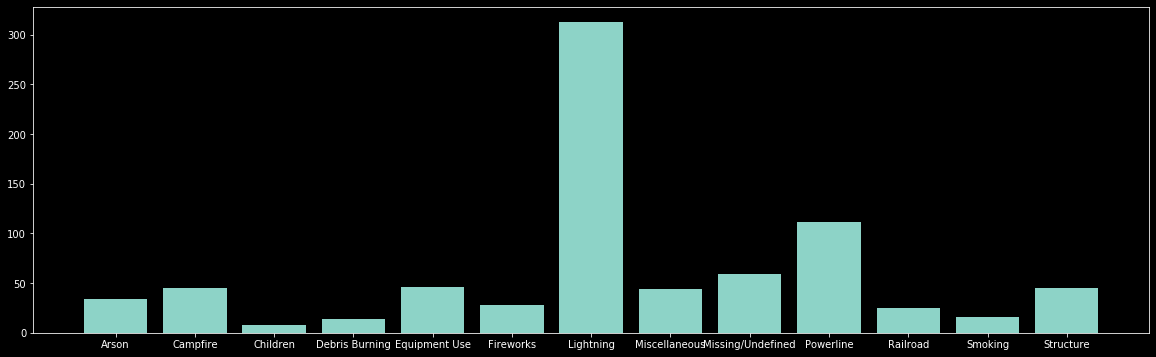

In [42]:
plt.figure(figsize=(20,6))

plt.bar(df.groupby('cause').mean()['size'].index, df.groupby('cause').mean()['size'])

<BarContainer object of 13 artists>

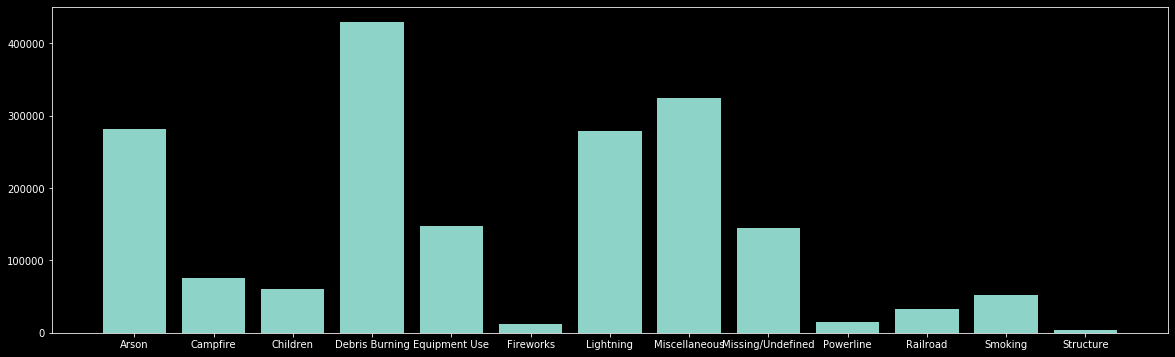

In [43]:
plt.figure(figsize=(20,6))

plt.bar(df.groupby('cause').count()['size'].index, df.groupby('cause').count()['size'])